In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\regis\\OneDrive\\Dokumente\\GitHub\\wake_effect\\delta_wind_velocity'

In [40]:
# load data - two data frames
wind_dir = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Wind_direction.csv')
wind_v = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Windfarm.csv')
wind_dir.head(4)

,Unnamed: 0,10.0,40.0,60.0,80.0,100.0
0,2013-08-01 00:00:00,NaN,NaN,129.7,110.8,113.0
1,2013-08-01 00:10:00,NaN,NaN,111.9,113.0,115.5
2,2013-08-01 00:20:00,NaN,NaN,116.3,110.2,112.2
3,2013-08-01 00:30:00,NaN,NaN,115.2,112.6,115.9


In [41]:
# merge two dataframes
df = wind_dir.merge(wind_v, left_on='Unnamed: 0', right_on='Unnamed: 0')
df.head(4)

,Unnamed: 0,10.0,40.0,60.0,80.0,100.0,WTG1,WTG2,WTG3,WTG4,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
0,2013-08-01 00:00:00,NaN,NaN,129.7,110.8,113.0,11.3,12.4,10.4,9.8,...,13.4,12.5,12.2,12.6,12.5,12.8,13.8,12.9,12.4,8.9
1,2013-08-01 00:10:00,NaN,NaN,111.9,113.0,115.5,11.6,11.9,10.4,10.7,...,12.7,13.0,12.5,14.4,12.4,12.8,13.4,13.1,13.2,9.8
2,2013-08-01 00:20:00,NaN,NaN,116.3,110.2,112.2,11.8,12.5,10.8,10.6,...,12.2,12.1,11.7,12.2,12.0,12.2,13.2,12.4,12.3,8.7
3,2013-08-01 00:30:00,NaN,NaN,115.2,112.6,115.9,11.7,11.6,10.6,10.4,...,12.8,13.2,10.9,12.4,12.3,12.3,12.4,11.8,10.5,8.6


In [42]:
# Wind Direction Analysis

# Drop columns with inconsistent wind_dir records
# Get mean wind direction per angle, between average of 80.0 and 100.0. Group wind_dir by steps of 10.
# Rename numerical titles
df1 = df.drop(columns = ['10.0'])
df1 = df.drop(columns = ['40.0'])
df1 = df.drop(columns = ['60.0'])
df1['wind_dir'] = ((df['80.0'] + df['100.0'])/2).round(-1)
df1['80.0'] = df['80.0'].round(0)
df1['100.0'] = df['100.0'].round(0)
df1 = df1.rename(columns={'80.0': 'eighty', '100.0': 'hundred'})
df1.head(4)

,Unnamed: 0,10.0,40.0,eighty,hundred,WTG1,WTG2,WTG3,WTG4,WTG5,...,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32,wind_dir
0,2013-08-01 00:00:00,NaN,NaN,111.0,113.0,11.3,12.4,10.4,9.8,9.9,...,12.5,12.2,12.6,12.5,12.8,13.8,12.9,12.4,8.9,110.0
1,2013-08-01 00:10:00,NaN,NaN,113.0,116.0,11.6,11.9,10.4,10.7,10.6,...,13.0,12.5,14.4,12.4,12.8,13.4,13.1,13.2,9.8,110.0
2,2013-08-01 00:20:00,NaN,NaN,110.0,112.0,11.8,12.5,10.8,10.6,10.4,...,12.1,11.7,12.2,12.0,12.2,13.2,12.4,12.3,8.7,110.0
3,2013-08-01 00:30:00,NaN,NaN,113.0,116.0,11.7,11.6,10.6,10.4,10.1,...,13.2,10.9,12.4,12.3,12.3,12.4,11.8,10.5,8.6,110.0


In [43]:
# count amount of entries per angle for 80m wind direction
# same for 100m wind direction
df_eighty = pd.DataFrame()
df_eighty['eighty'] = df1['eighty']
df_eighty['count_rows'] = df1.groupby(['eighty'])['eighty'].transform('count')
df_eighty = df_eighty.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df_eighty = df_eighty.sort_values(['eighty'])
#df_eighty.loc[df_eighty['eighty'] == 100]

df_hundred = pd.DataFrame()
df_hundred['hundred'] = df1['hundred']
df_hundred['count_rows'] = df1.groupby(['hundred'])['hundred'].transform('count')
df_hundred = df_hundred.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df_hundred = df_hundred.sort_values(['hundred'])
#df_hundred.loc[df_hundred['hundred'] == 100]

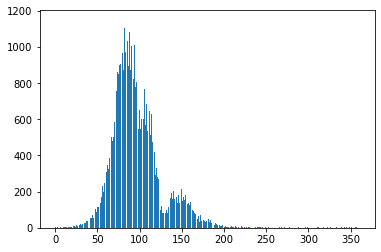

In [44]:
# create bar plot of amount of entries of wind_dir at 80m
wind_dir = df_eighty['eighty']
amount = df_eighty['count_rows']
 
# Figure Size
fig = plt.figure()
plt.bar(wind_dir, amount)
plt.show()

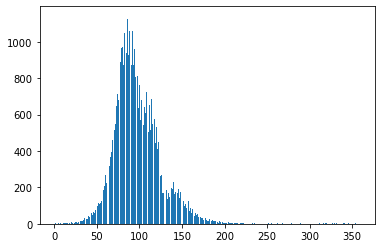

In [45]:
# create bar plot of amount of entries of wind_dir at 1000m
wind_dir = df_hundred['hundred']
amount = df_hundred['count_rows']
 
# Figure Size
fig = plt.figure()
plt.bar(wind_dir, amount)
plt.show()

In [ ]:
# Wind Speed Analysis

